<a href="https://colab.research.google.com/github/asadstat/Data_analysis/blob/master/Image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import random

import cv2
import glob
from PIL import Image

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [9]:
# function to read images from path. results are images
def read_images(path):
    return [Image.open(file) for file in glob.glob(path)]

In [25]:
path_y = "drive/My Drive/yes/*.jpg"
images_y = read_images(path_y)
print(len(images_y))

86


In [26]:
path_n = "drive/My Drive/no/*.jpg"
images_n = read_images(path_n)
print(len(images_n))

85


In [27]:
def show_images(img1, img2):
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.title('Brain with tumor')
    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.title('Brain without tumor')

In [29]:
# show random image
def show_random_images(list1, list2):
    plt.subplot(1,2,1)
    plt.imshow(random.choice(list1))
    plt.title('Brain with tumor')
    plt.subplot(1,2,2)
    plt.imshow(random.choice(list2))
    plt.title('Brain without tumor')

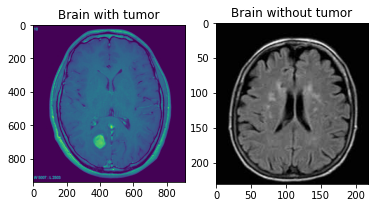

In [30]:
show_random_images(images_y, images_n)

In [31]:
def square_image(list_of_images):
    res = []
    for img in list_of_images:
        desired_size = (max(img.size), max(img.size))
        position = int(max(img.size)/2) - int(min(img.size)/2) 
        sq_img = Image.new("RGB", desired_size, color='black')
        if img.size[0] < img.size[1]:
            sq_img.paste(img, (0, position))
        else:
            sq_img.paste(img, (position, 0))
        res.append(sq_img)
    return res

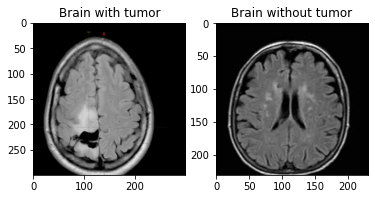

In [32]:
images_y_sq = square_image(images_y)
images_n_sq = square_image(images_n)
show_random_images(images_y_sq, images_n_sq)

In [33]:
# now we want to reshape all the images to 128x128
def resize_images(list_of_images, size=128):
    return [img.resize((size,size)) for img in list_of_images]

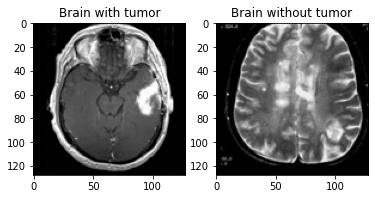

In [34]:
images_y_sq_rs = resize_images(images_y_sq)
images_n_sq_rs = resize_images(images_n_sq)
show_random_images(images_y_sq_rs, images_n_sq_rs)

In [35]:
# now we start to use open cv library, that works with numpy arrays instead of images
def image_to_nparray(list_of_images):
    return [np.array(img) for img in list_of_images]

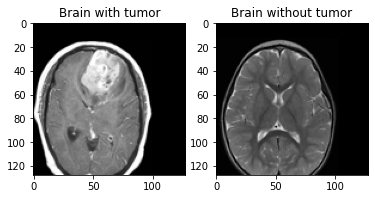

In [36]:
images_y_sq_rs_np = image_to_nparray(images_y_sq_rs)
images_n_sq_rs_np = image_to_nparray(images_n_sq_rs)
show_random_images(images_y_sq_rs_np, images_n_sq_rs_np)

In [37]:
# function to get gray scale images
def img_to_gray_scale(list_of_images):
    return [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in list_of_images]

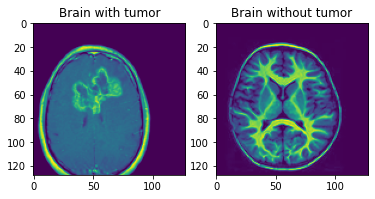

In [38]:
images_y_sq_rs_np_gs = img_to_gray_scale(images_y_sq_rs_np)
images_n_sq_rs_np_gs = img_to_gray_scale(images_n_sq_rs_np)
show_random_images(images_y_sq_rs_np_gs, images_n_sq_rs_np_gs)

# New Section